<a href="https://colab.research.google.com/github/sza919/Flappy_bird_RL_coins/blob/main/FPB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [107]:
# read_data

with open("play_metrics_900frames.json", 'r') as f:
  data900 = json.load(f)

with open("play_metrics_1800_frames.json", 'r') as f:
  data1800 = json.load(f)

with open("play_metrics_900frames_simple.json", 'r') as f:
  data900_simple = json.load(f)

with open("play_metrics_1800_frames_simple.json", 'r') as f:
  data1800_simple = json.load(f)

with open("play_metrics_900frames_best_tj.json", 'r') as f:
  data900_best_tj = json.load(f)

with open("play_metrics_1800_frames_best_tj.json", 'r') as f:
  data1800_best_tj = json.load(f)

In [67]:
data900_best_tj.keys()

dict_keys(['episodes', 'scores', 'coins_collected', 'max_scores', 'rolling_mean_scores', 'max_score', 'total_coins', 'pipe_passed'])

In [108]:
data_loader = [data900, data1800, data900_simple, data1800_simple, data900_best_tj, data1800_best_tj]

# preprocessing
field = ['scores', 'coins_collected', 'rolling_mean_scores']

for i in range(len(data_loader)):
  data = data_loader[i]
  for k in field:
    data[k] = np.array(data[k])
  data["pipe_passed"] = data["scores"] - data['coins_collected'] * 5

In [112]:
data900_loader = [data900, data900_best_tj, data900_simple]
data1800_loader = [data1800, data1800_best_tj, data1800_simple]

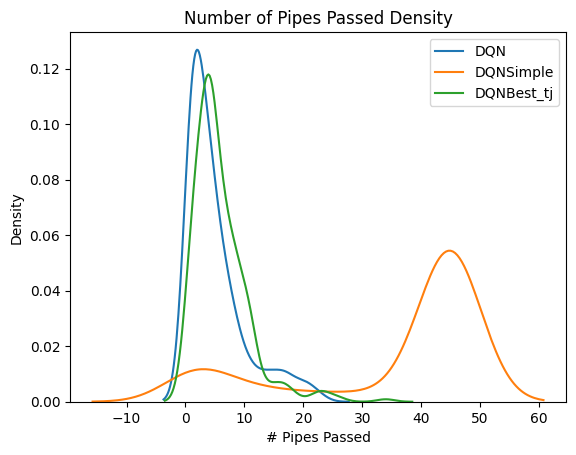

In [17]:
# survival prob density curves
for data in data1800_loader:
  # density
  sns.kdeplot(data['pipe_passed'])

plt.title("Number of Pipes Passed Density")
plt.xlabel("# Pipes Passed")
plt.ylabel("Density")
plt.legend(["DQN", "DQNSimple", "DQNBest_tj"])
plt.show()

In [132]:
x_vals = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
survival = []
for data in data1800_loader:
  # density
  y_vals = np.array([np.sum(data['pipe_passed'] >= x) for x in x_vals]) / 300
  data["survival_after_pipes"] = y_vals
  survival.append(y_vals)

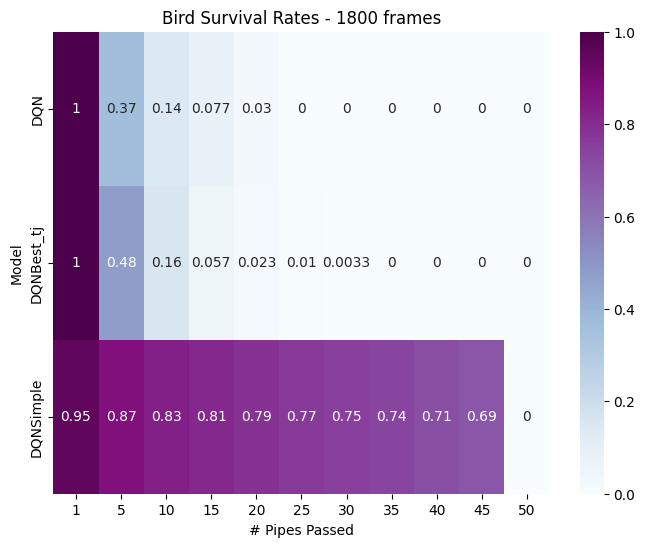

In [133]:
plt.figure(figsize=(8, 6))
sns.heatmap(survival, cmap="BuPu", annot=True,
            xticklabels=x_vals, yticklabels=["DQN", "DQNBest_tj", "DQNSimple"])

plt.title("Bird Survival Rates - 1800 frames")
plt.xlabel("# Pipes Passed")
plt.ylabel("Model")
plt.savefig("11.png", dpi=600)

In [137]:
x_vals = [0, 1, 5, 10, 20, 30, 40,  50, 60, 70, 80]
survival = []
for data in data1800_loader:
  # density
  y_vals = np.array([np.sum(data['scores'] >= x) for x in x_vals]) / 300
  data["scores_dist"] = y_vals
  survival.append(y_vals)

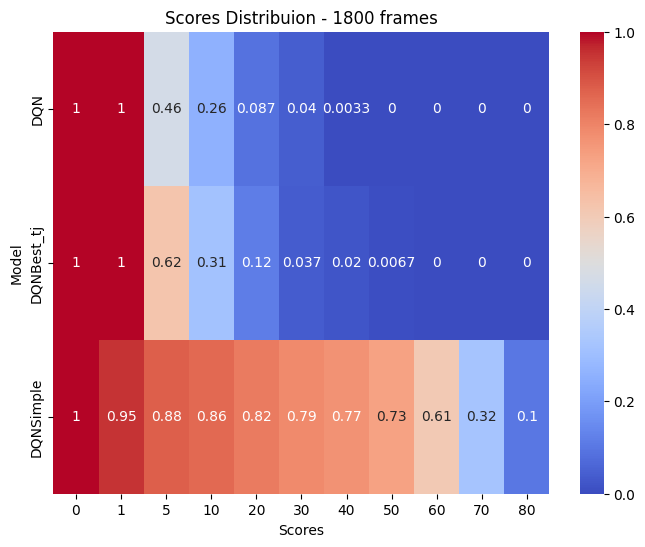

In [138]:
plt.figure(figsize=(8, 6))
sns.heatmap(survival, cmap="coolwarm",annot=True,
            xticklabels=x_vals, yticklabels=["DQN", "DQNBest_tj", "DQNSimple"])

plt.title("Scores Distribuion - 1800 frames")
plt.xlabel("Scores")
plt.ylabel("Model")
plt.savefig("11.png", dpi=600)

In [142]:
x_vals = list(range(1, 7, 2))
survival = []
for data in data1800_loader:
  # density
  y_vals = np.array([np.sum(data['coins_collected'] >= x) for x in x_vals]) / 300
  data["coin_dist"] = y_vals
  survival.append(y_vals)

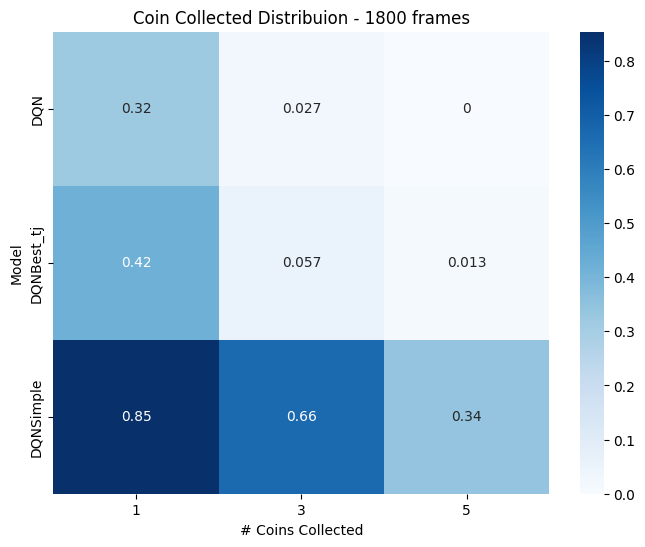

In [143]:
plt.figure(figsize=(8, 6))
sns.heatmap(survival, cmap="Blues",annot=True,
            xticklabels=x_vals, yticklabels=["DQN", "DQNBest_tj", "DQNSimple"])

plt.title("Coin Collected Distribuion - 1800 frames")
plt.xlabel("# Coins Collected")
plt.ylabel("Model")
plt.savefig("11.png", dpi=600)

Text(0, 0.5, 'Model')

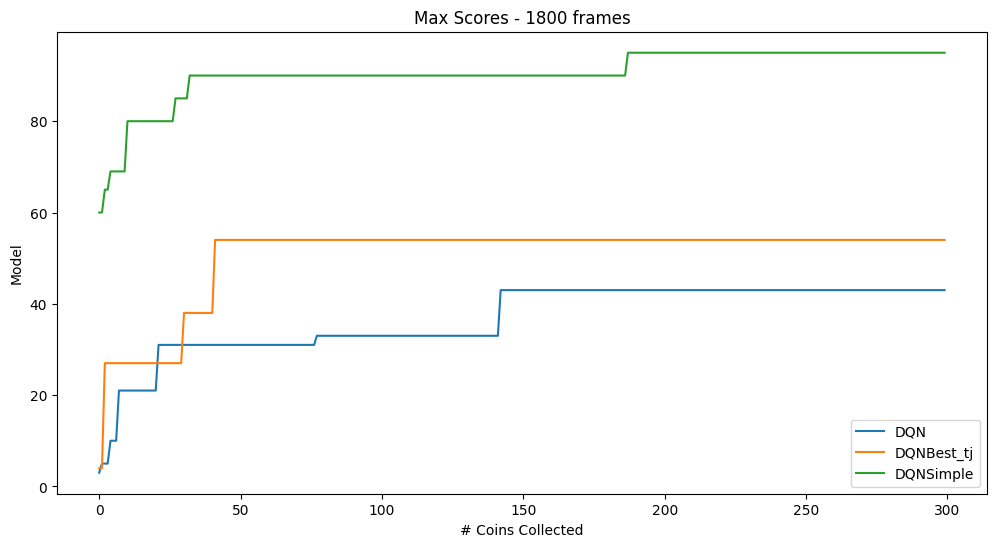

In [119]:
plt.figure(figsize=(12, 6))
for data in data1800_loader:
  plt.plot(data["max_scores"])
plt.legend(["DQN", "DQNBest_tj", "DQNSimple"])

plt.title("Max Scores - 1800 frames")
plt.xlabel("# Coins Collected")
plt.ylabel("Model")

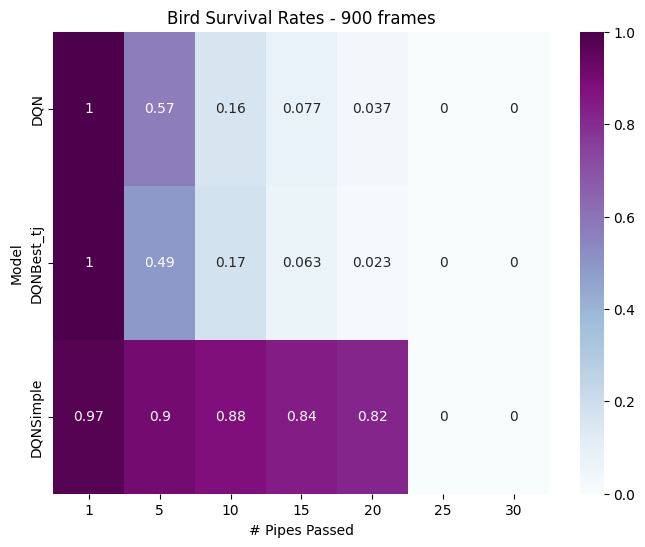

In [134]:
x_vals = [1, 5, 10, 15, 20, 25, 30]
survival = []
for data in data900_loader:
  # density
  y_vals = np.array([np.sum(data['pipe_passed'] >= x) for x in x_vals]) / 300
  data["survival_after_pipes"] = y_vals
  survival.append(y_vals)

plt.figure(figsize=(8, 6))
sns.heatmap(survival, cmap="BuPu", annot=True,
            xticklabels=x_vals, yticklabels=["DQN", "DQNBest_tj", "DQNSimple"])

plt.title("Bird Survival Rates - 900 frames")
plt.xlabel("# Pipes Passed")
plt.ylabel("Model")
plt.savefig("12.png", dpi=600)

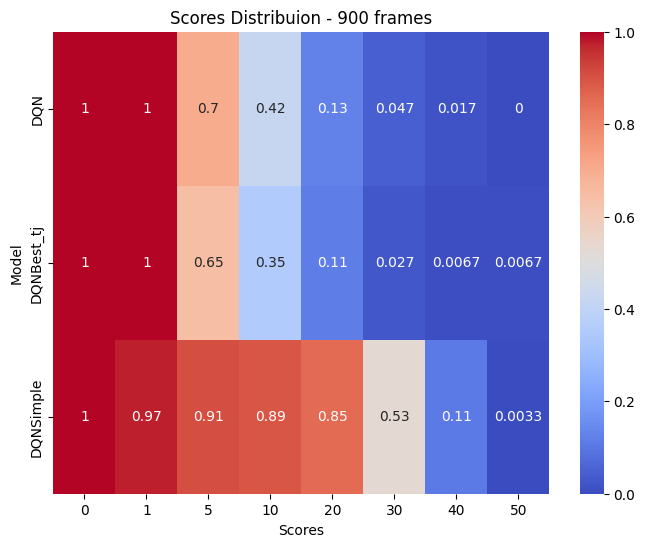

In [139]:
x_vals = [0, 1, 5, 10, 20, 30, 40,  50]
survival = []
for data in data900_loader:
  # density
  y_vals = np.array([np.sum(data['scores'] >= x) for x in x_vals]) / 300
  data["scores_dist"] = y_vals
  survival.append(y_vals)


plt.figure(figsize=(8, 6))
sns.heatmap(survival, cmap="coolwarm",annot=True,
            xticklabels=x_vals, yticklabels=["DQN", "DQNBest_tj", "DQNSimple"])

plt.title("Scores Distribuion - 900 frames")
plt.xlabel("Scores")
plt.ylabel("Model")
plt.savefig("12.png", dpi=600)

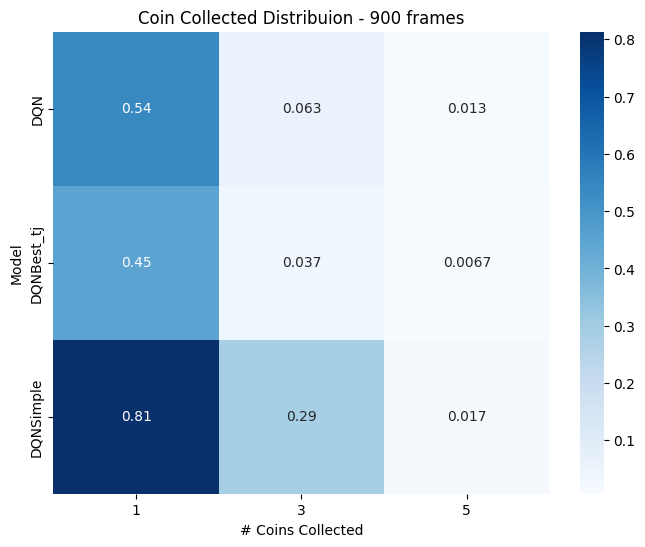

In [141]:
x_vals = list(range(1, 7, 2))
survival = []
for data in data900_loader:
  # density
  y_vals = np.array([np.sum(data['coins_collected'] >= x) for x in x_vals]) / 300
  data["coin_dist"] = y_vals
  survival.append(y_vals)

plt.figure(figsize=(8, 6))
sns.heatmap(survival, cmap="Blues",annot=True,
            xticklabels=x_vals, yticklabels=["DQN", "DQNBest_tj", "DQNSimple"])

plt.title("Coin Collected Distribuion - 900 frames")
plt.xlabel("# Coins Collected")
plt.ylabel("Model")
plt.savefig("12.png", dpi=600)

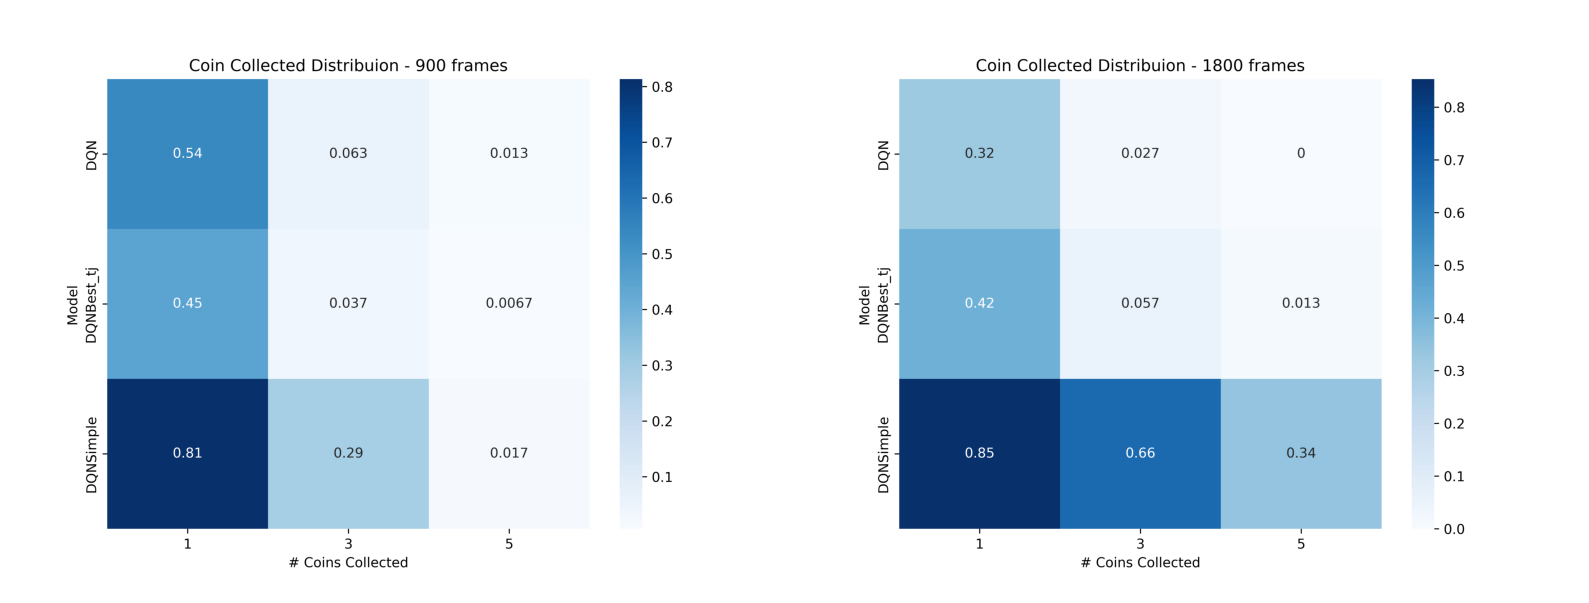

In [144]:
import matplotlib.image as mpimg
img1_path = "/content/12.png"  # 900 frames
img2_path = "/content/11.png"  # 1800 frames

img1 = mpimg.imread(img1_path)
img2 = mpimg.imread(img2_path)

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Display images in the subplots
axes[0].imshow(img1)
axes[0].axis("off")

axes[1].imshow(img2)
axes[1].axis("off")

plt.tight_layout()
plt.show()